--- Statistics ---
         daily_cases  retail_recreation     workplaces
count  115675.000000      115675.000000  115675.000000
mean       93.267612          -2.184595     -21.656685
std       593.660980          17.032390      13.444397
min         0.000000         -92.000000     -93.000000
25%         1.000000         -12.000000     -28.000000
50%        13.000000          -2.000000     -20.000000
75%        54.000000           8.000000     -13.000000
max     99926.000000         236.000000      43.000000


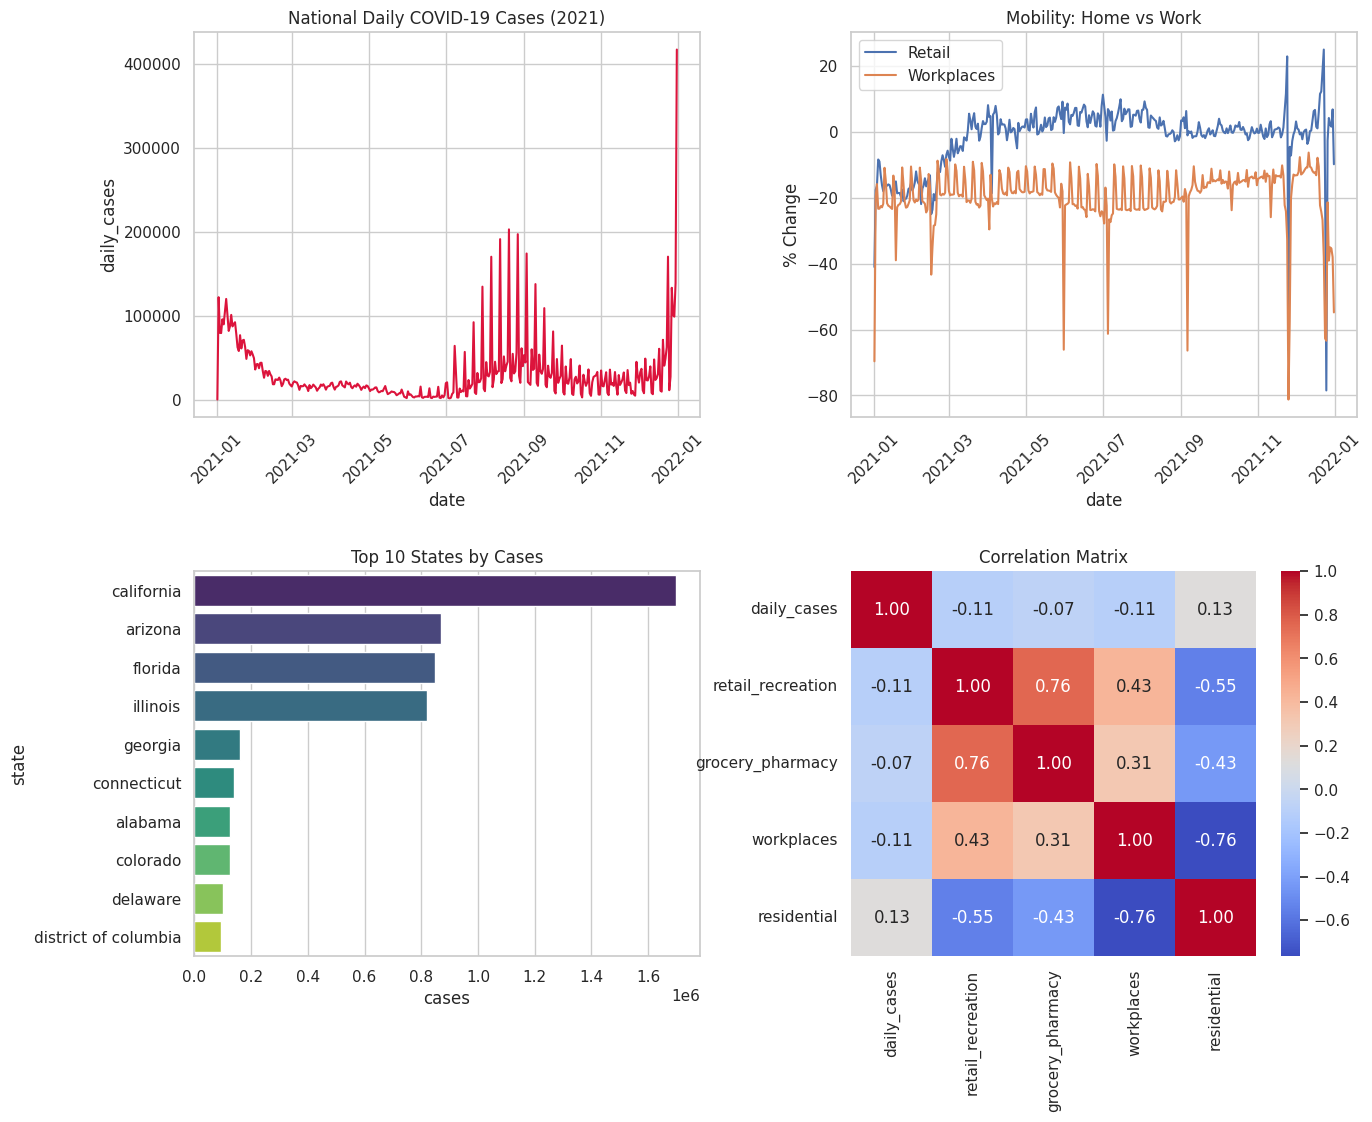

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 12)

try:
    df = pd.read_csv('US_Covid_Mobility_2021.csv.csv')
    df['date'] = pd.to_datetime(df['date'])
except FileNotFoundError:
    try:
        df = pd.read_csv('US_Covid_Mobility_2021.csv')
        df['date'] = pd.to_datetime(df['date'])
    except FileNotFoundError:
        print("Error: File not found. Please upload 'US_Covid_Mobility_2021.csv.csv' to the files section.")
        raise

df_clean = df.dropna(subset=['retail_recreation', 'workplaces', 'residential'])

print("--- Statistics ---")
print(df_clean[['daily_cases', 'retail_recreation', 'workplaces']].describe())

fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

daily_cases = df.groupby('date')['daily_cases'].sum().reset_index()
sns.lineplot(data=daily_cases, x='date', y='daily_cases', ax=axes[0, 0], color='crimson')
axes[0, 0].set_title('National Daily COVID-19 Cases (2021)')
axes[0, 0].tick_params(axis='x', rotation=45)

mobility = df.groupby('date')[['retail_recreation', 'workplaces']].mean().reset_index()
sns.lineplot(data=mobility, x='date', y='retail_recreation', ax=axes[0, 1], label='Retail')
sns.lineplot(data=mobility, x='date', y='workplaces', ax=axes[0, 1], label='Workplaces')
axes[0, 1].set_title('Mobility: Home vs Work')
axes[0, 1].set_ylabel('% Change')
axes[0, 1].tick_params(axis='x', rotation=45)

top_states = df.groupby('state')['cases'].max().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_states, x='cases', y='state', ax=axes[1, 0], palette='viridis', hue='state', legend=False)
axes[1, 0].set_title('Top 10 States by Cases')

corr_cols = ['daily_cases', 'retail_recreation', 'grocery_pharmacy', 'workplaces', 'residential']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix')

plt.show()